# Homework 2.2 - Using Python (.py) files to run codeac

### The decision to use notebooks or .py files

Jupyter Notebooks and `.py` files serve different purposes and have distinct advantages:

* **Jupyter Notebooks** are interactive and allow for a mix of code, text, and multimedia. They are excellent for data exploration, visualisation, and sharing results. Each cell in a notebook can be run independently, and the output is displayed immediately beneath the cell. This makes it easy to iterate on specific parts of your code without rerunning the entire script. Notebooks also support markdown, enabling you to create rich, well-documented reports that combine your code, findings, and explanations.

* On the flip side, **.py files** are text-based files that contain pure Python code. They are typically used for building larger applications, libraries, or scripts. `.py` files are more suitable for production use and version control and, unlike notebooks, `.py` files don't allow for interactive outputs or mixing code with extensive markdown text.

While notebooks are great for interactive, exploratory analysis and teaching, `.py` files are better suited for building reusable code, larger projects, and production-ready software.

### How to use `.py` files

When using `.py` files, it's important to adhere to certain best practices to ensure your code is clean, efficient, and easy to understand.

**Imports**: Always import packages and modules at the beginning of your file. This makes it easy to see what dependencies a module has. Follow the order: standard library imports, related third party imports, and local application/library specific imports. Each group should have its own block separated by a blank line.

**Docstrings**: Docstrings are used for documentation of functions, methods, and classes. They are enclosed in triple quotes (""") and are located immediately after the definition of a function, method, or class. A good docstring should explain what the function does, its inputs, its outputs, and any exceptions it raises.

**Code comments**: Comments are an integral part of code documentation and are used to explain the purpose and functionality of sections of code. In Python, comments are created by starting a line with the `#` symbol.

**Running Code on CMD Line**: To run a `.py` file from the command line, navigate to the directory containing the file and use the command `python filename.py`.

Remember, consistency and readability are key. Following these best practices will make your code easier to read, maintain, and debug. It's also recommended to follow the PEP 8 style guide for Python code.

### Homework challenge

This week's homework will lay the foundations for the capstone project in week 3. One of the most common datasets in the machine learning space is the Iris dataset. The Iris dataset is a collection of 150 measurements of three species of iris flowers: setosa, versicolor, and virginica. Each measurement includes the length and width of the sepal and petal of a flower in centimeters. The dataset is widely used as an example of multivariate analysis and machine learning techniques.

Your task is to perform some exploratory data analysis on the Iris dataset, perhaps exploring the relationship between each feature and creating relevant plots to help tell the story! How you choose to interrogate the data is up to you; use the previous notebook to help you decide on the different ways you could!

The following code cell will create a new `.py` file with the base code needed to load in the dataset to a Pandas DataFrame - feel free to run it, create your own file or continue in a notebook... what you feel most comfortable doing. Happy analysing!


In [2]:
#%%writefile iris_eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv') # Read data from URL

print(raw_data.head()) # print first 5 rows of data


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
raw_data.dtypes
clean_data = raw_data.copy() # Make a copy of the data to work with
#replace all nan with np.nan
clean_data = clean_data.replace('nan', np.nan)

for col in clean_data.columns: # Loop through each column.
    print(f"{col}: {clean_data[col].isna().sum()}") # Check for missing values in each column.

sepal_length: 0
sepal_width: 0
petal_length: 0
petal_width: 0
species: 0


In [7]:
# show all discriptive statistics
print(clean_data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# show all discriptive statistics for each species
print(clean_data.groupby('species').describe())

           sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                   

In [9]:
# show count of each species
print(clean_data['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [12]:
# show avetage , mazx and min of petal width & petal length for each species
print(clean_data.groupby('species')['petal_width'].agg(['mean', 'max', 'min']))
print(clean_data.groupby('species')['petal_length'].agg(['mean', 'max', 'min']))

             mean  max  min
species                    
setosa      0.244  0.6  0.1
versicolor  1.326  1.8  1.0
virginica   2.026  2.5  1.4
             mean  max  min
species                    
setosa      1.464  1.9  1.0
versicolor  4.260  5.1  3.0
virginica   5.552  6.9  4.5


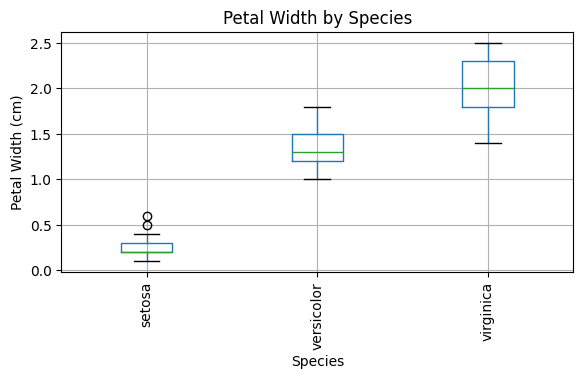

In [13]:
# box plot of petal width for each species
clean_data.boxplot(column='petal_width', by='species') # Plot a boxplot of order_cost by country
plt.ylabel('Petal Width (cm)') # Set the y-axis label
plt.xlabel('Species') # Set the x-axis label
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees
plt.subplots_adjust(bottom=0.4) # Adjust the bottom of the plot to make room for the x-axis labels
plt.suptitle('') # Remove the default super-title
plt.title('Petal Width by Species') # Set the title of the plot
plt.show() # Show the plot


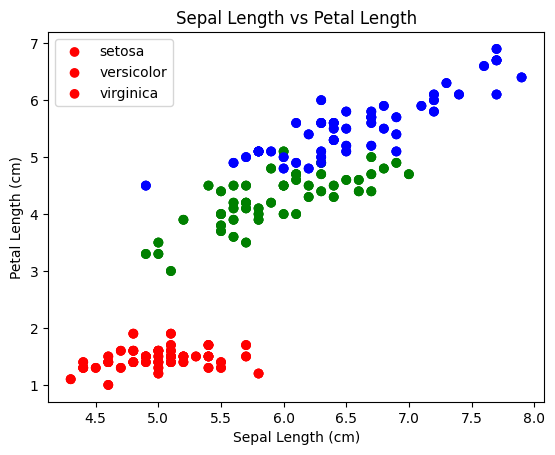

: 

In [23]:
# Define the color mapping
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}
# Scatter plot to find relation between sepals and petals
plt.scatter(clean_data['sepal_length'], clean_data['petal_length'], c=clean_data['species'].apply(lambda x: colors[x] ))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.legend(clean_data['species'].unique())
plt.show()

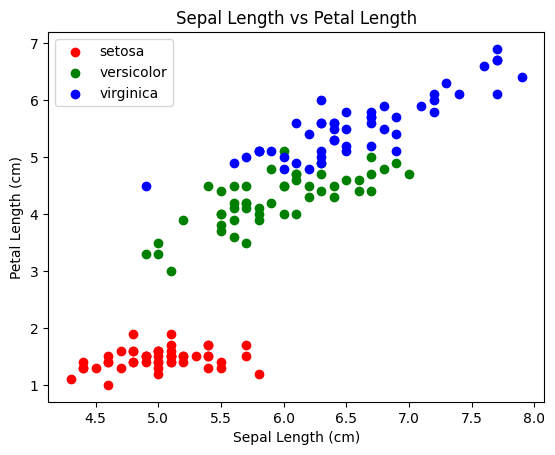

In [17]:
# Define the color mapping
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

# Create a scatter plot for each species
for species in clean_data['species'].unique():
    plt.scatter(clean_data[clean_data['species']==species]['sepal_length'], 
                clean_data[clean_data['species']==species]['petal_length'], 
                color=colors[species], 
                label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')

# Add a legend
plt.legend()

plt.show()